In [10]:
import pandas as pd

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

import matplotlib.pyplot as plt

hotel_data = pd.read_csv('dataset/Hotelbookings/bookings.csv')
hotel_data 

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled
0,Resort Hotel,Direct,No Deposit,342,0,0,0,3,0,0
1,Resort Hotel,Direct,No Deposit,737,0,0,0,4,0,0
2,Resort Hotel,Direct,No Deposit,7,0,0,0,0,0,0
3,Resort Hotel,Corporate,No Deposit,13,0,0,0,0,0,0
4,Resort Hotel,Online TA,No Deposit,14,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,Offline TA/TO,No Deposit,23,0,0,0,0,0,0
119386,City Hotel,Online TA,No Deposit,102,0,0,0,0,2,0
119387,City Hotel,Online TA,No Deposit,34,0,0,0,0,4,0
119388,City Hotel,Online TA,No Deposit,109,0,0,0,0,0,0


In [11]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           119390 non-null  object
 1   market_segment                  119390 non-null  object
 2   deposit_type                    119390 non-null  object
 3   lead_time                       119390 non-null  int64 
 4   previous_cancellations          119390 non-null  int64 
 5   previous_bookings_not_canceled  119390 non-null  int64 
 6   days_in_waiting_list            119390 non-null  int64 
 7   booking_changes                 119390 non-null  int64 
 8   total_of_special_requests       119390 non-null  int64 
 9   is_canceled                     119390 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 9.1+ MB


In [12]:
hotel_data['cancelled'] = hotel_data['is_canceled'].replace({1: 'Yes', 0: 'No'})

hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           119390 non-null  object
 1   market_segment                  119390 non-null  object
 2   deposit_type                    119390 non-null  object
 3   lead_time                       119390 non-null  int64 
 4   previous_cancellations          119390 non-null  int64 
 5   previous_bookings_not_canceled  119390 non-null  int64 
 6   days_in_waiting_list            119390 non-null  int64 
 7   booking_changes                 119390 non-null  int64 
 8   total_of_special_requests       119390 non-null  int64 
 9   is_canceled                     119390 non-null  int64 
 10  cancelled                       119390 non-null  object
dtypes: int64(7), object(4)
memory usage: 10.0+ MB


In [13]:
hotel_data['cancelled'].value_counts() 

No     75166
Yes    44224
Name: cancelled, dtype: int64

In [14]:
features=['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'booking_changes', 
          'total_of_special_requests']

hotel_data.groupby('cancelled')[features].mean()

,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests
cancelled,,,,,,
No,79.984687,0.015792,0.202977,1.589868,0.293364,0.714060
Yes,144.848815,0.208348,0.025122,3.564083,0.098340,0.328826


In [15]:
hotel_data.groupby('cancelled').agg({'lead_time': ['count','mean', 'std']}) 

lead_time                        
              count        mean         std
cancelled                                  
No            75166   79.984687   91.109888
Yes           44224  144.848815  118.624829

In [16]:
features=['hotel','lead_time',]

hotel_data.groupby('hotel')[features].mean()

,lead_time
hotel,
City Hotel,109.735724
Resort Hotel,92.675686


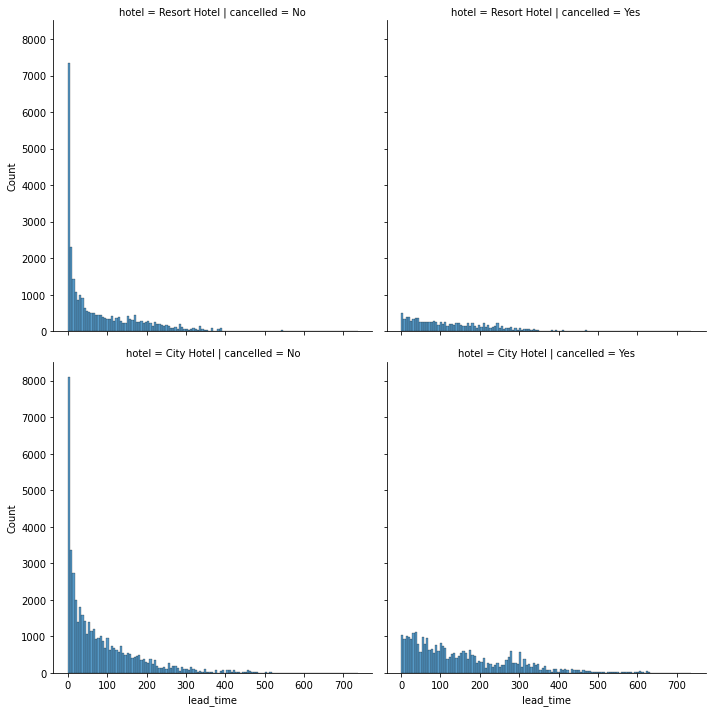

In [17]:
sns.displot(data=hotel_data, x='lead_time', col='cancelled', row='hotel');

In [18]:
hotel1_data=hotel_data[hotel_data['hotel'] == 'City Hotel'].copy() 

hotel1_data.groupby('cancelled').agg({'lead_time': ['count','mean', 'std']}) 

lead_time                        
              count        mean         std
cancelled                                  
No            46228   80.702734   89.863028
Yes           33102  150.281222  124.104915

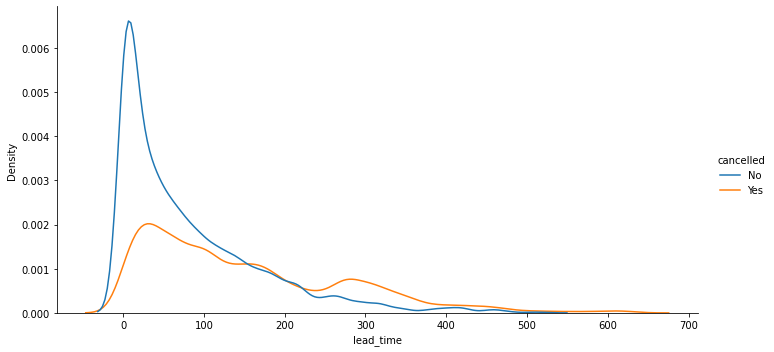

In [19]:
sns.displot(data=hotel1_data, kind='kde', x='lead_time', hue='cancelled', aspect=2 );

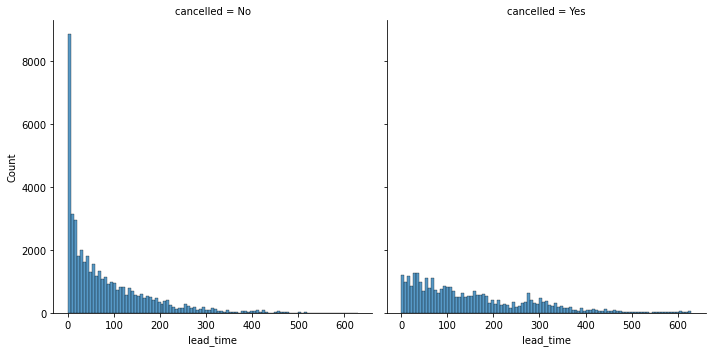

In [20]:
sns.displot(x='lead_time', col='cancelled', data=hotel1_data); 

In [21]:
hotel1_data.groupby('cancelled').agg({'lead_time': ['count','mean', 'std']})

lead_time                        
              count        mean         std
cancelled                                  
No            46228   80.702734   89.863028
Yes           33102  150.281222  124.104915

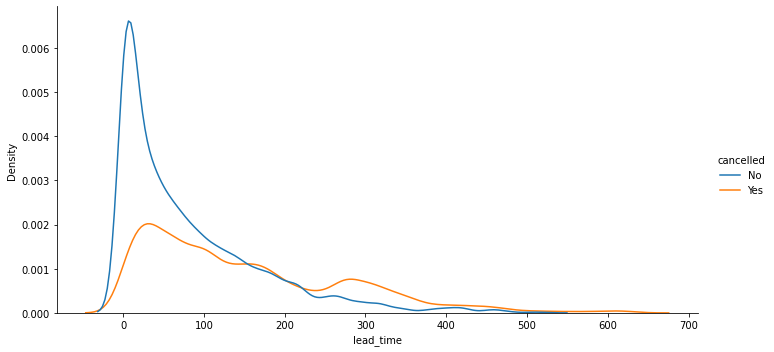

In [22]:
sns.displot(data=hotel1_data, kind='kde', x='lead_time', hue='cancelled', aspect=2 );

In [23]:
features=['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'booking_changes', 'total_of_special_requests']

hotel1_data.groupby('cancelled')[features].mean() 

,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests
cancelled,,,,,,
No,80.702734,0.021156,0.208510,2.150082,0.264364,0.741088
Yes,150.281222,0.161561,0.026041,4.730409,0.079844,0.275754


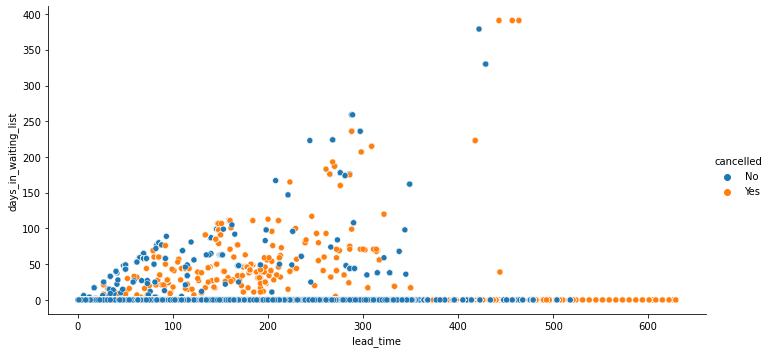

In [24]:
sns.relplot(data=hotel1_data, x='lead_time', y='days_in_waiting_list', hue='cancelled', aspect=2);

In [25]:
hotel2_data=hotel_data[hotel_data['hotel'] == 'Resort Hotel'].copy() #creating the new slice 

hotel2_data['cancelled'].value_counts() 

No     28938
Yes    11122
Name: cancelled, dtype: int64

In [26]:
hotel2_data.groupby('cancelled').agg({'lead_time': ['count','mean', 'std']}) 

lead_time                       
              count        mean        std
cancelled                                 
No            28938   78.837618  93.057146
Yes           11122  128.680543  98.816173

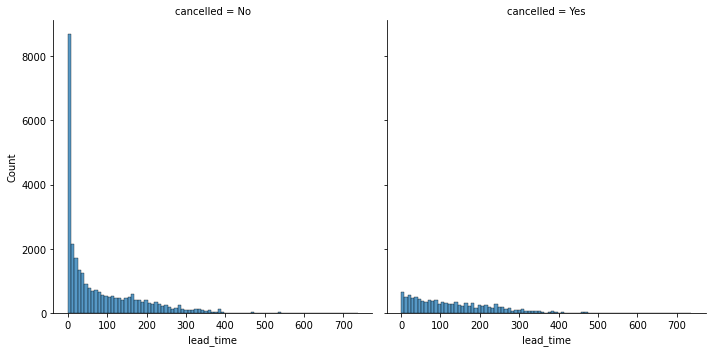

In [27]:
sns.displot(x='lead_time', col='cancelled', data=hotel2_data);

In [28]:
hotel2_data.groupby('cancelled').agg({'lead_time': ['count','mean', 'std']})

lead_time                       
              count        mean        std
cancelled                                 
No            28938   78.837618  93.057146
Yes           11122  128.680543  98.816173

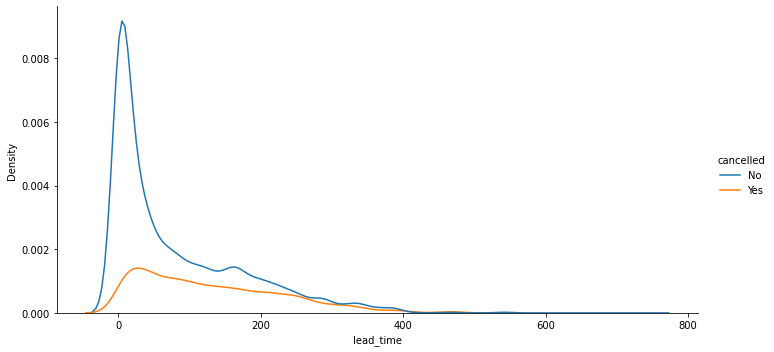

In [29]:
sns.displot(data=hotel2_data, kind='kde', x='lead_time', hue='cancelled', aspect=2 ); 

In [30]:
features=['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'booking_changes', 'total_of_special_requests']

hotel2_data.groupby('cancelled')[features].mean()

,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests
cancelled,,,,,,
No,78.837618,0.007222,0.194139,0.694934,0.339692,0.670883
Yes,128.680543,0.347599,0.022388,0.092789,0.153390,0.486783


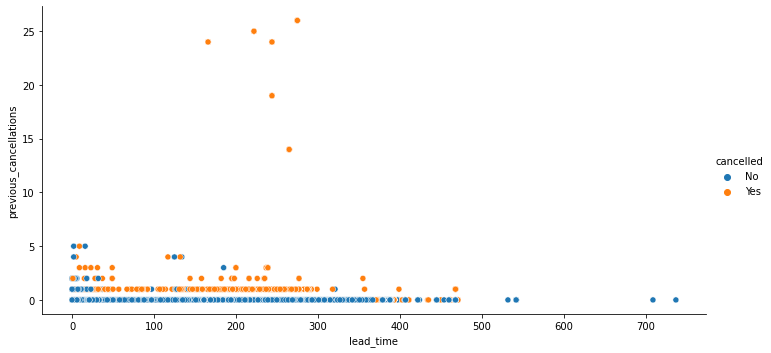

In [31]:
sns.relplot(data=hotel2_data, x='lead_time', y='previous_cancellations', hue='cancelled', aspect=2); 

In [32]:
y = hotel1_data['cancelled']

all_features=['lead_time' , 'previous_cancellations', 'previous_bookings_not_canceled' , 'days_in_waiting_list', 'booking_changes' , 'total_of_special_requests']
X_all=hotel1_data[all_features]

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, train_size=0.8, random_state=1)

print("Size of X_all_train: ",X_all_train.shape)
print("Length of y_all_train: ",len(y_all_train))
print("Size of X_all_test: ",X_all_test.shape)
print("Length of y_all_test: ",len(y_all_test))

Size of X_all_train:  (63464, 6)
Length of y_all_train:  63464
Size of X_all_test:  (15866, 6)
Length of y_all_test:  15866


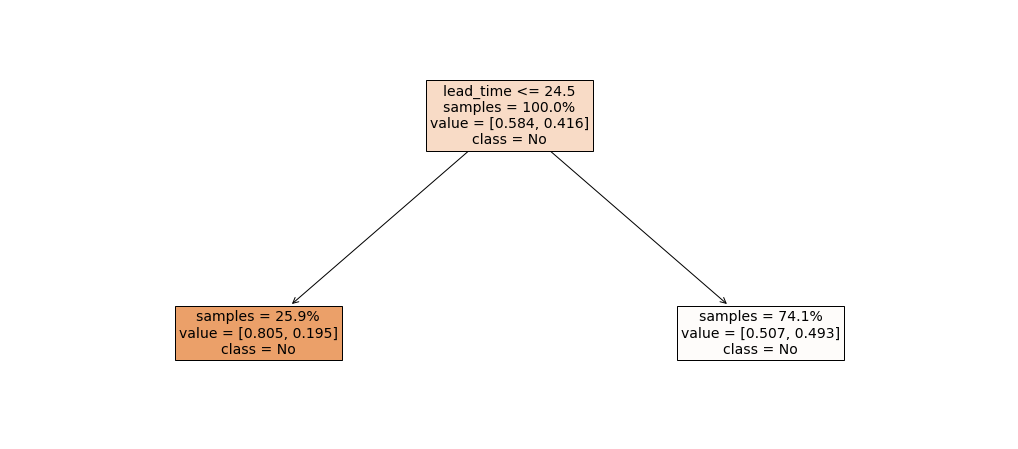

In [33]:
input_features=['lead_time']

tree_model_lead = DecisionTreeClassifier(max_depth=1)
tree_model_lead.fit(X_all_train[input_features], y_all_train)

fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model_lead,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No","Yes"], ax=ax, fontsize=14); 

In [34]:
y_pred_lead = tree_model_lead.predict(X_all_test[input_features])

    
pd.crosstab(y_all_test, y_pred_lead, rownames=["Actual"], colnames=["Predicted"], margins=True)

Predicted,No,All
Actual,,
No,9162,9162
Yes,6704,6704
All,15866,15866


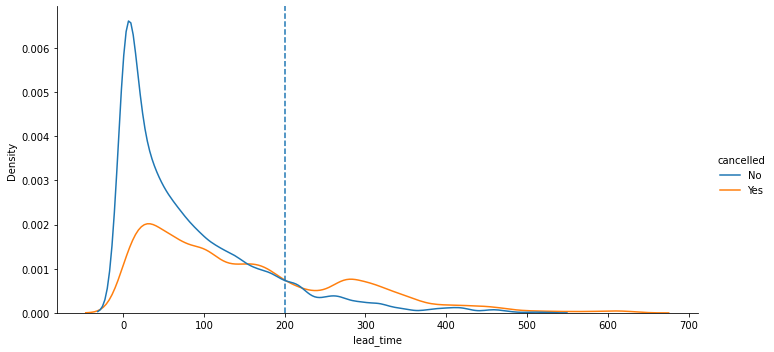

In [35]:
fg = sns.displot(kind='kde', x='lead_time', hue='cancelled', data=hotel1_data, aspect=2);

fg.ax.axvline(200, ls='--');

In [36]:
y_pred_human = pd.cut(X_all_test['lead_time'], bins=[0,200,800], labels=['No','Yes'], include_lowest=True)

pd.crosstab(y_all_test, y_pred_human, rownames=["Actual"], colnames=["Predicted"], margins=True)

Predicted,No,Yes,All
Actual,,,
No,8208,954,9162
Yes,4724,1980,6704
All,12932,2934,15866


In [37]:
print("Precision: " , 1980/2934*100)
print("Recall: " , 1980/6704*100)

Precision:  67.48466257668711
Recall:  29.534606205250597


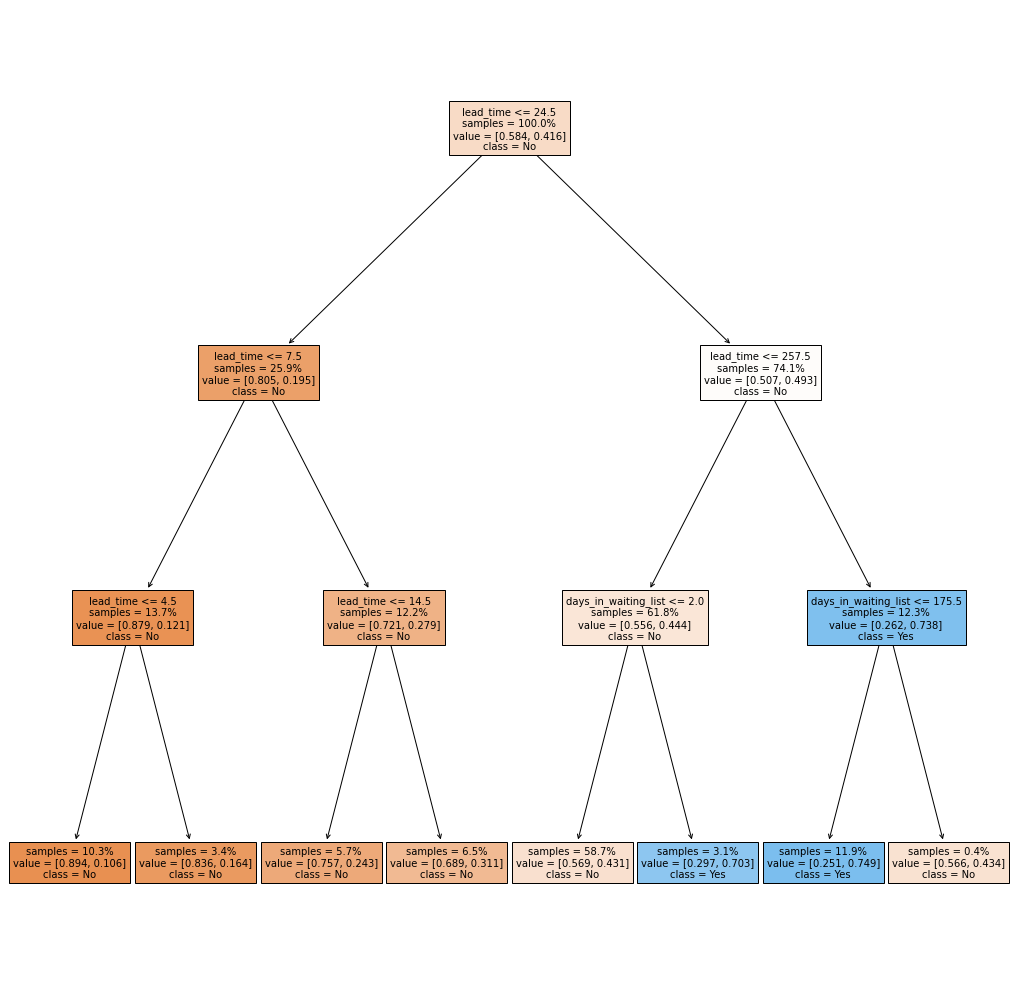

In [38]:
input_featuresb=[ 'lead_time', 'days_in_waiting_list']

tree_model_lt_diwl = DecisionTreeClassifier(max_depth=3)
tree_model_lt_diwl.fit(X_all_train[input_featuresb], y_all_train)

fig, ax = plt.subplots(figsize=(18,18))
plot_tree(tree_model_lt_diwl,  filled=True, impurity=False, feature_names=input_featuresb, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=10); 

In [39]:
y_pred_lt_diwl = tree_model_lt_diwl.predict(X_all_test[input_featuresb])
pd.crosstab(y_all_test, y_pred_lt_diwl, rownames=["Actual"], colnames=["Predicted"], margins=True)

Predicted,No,Yes,All
Actual,,,
No,8541,621,9162
Yes,4917,1787,6704
All,13458,2408,15866


In [40]:
print("Precision: " , 1787/2408*100)
print("Recall: " , 1787/6704*100)

Precision:  74.21096345514951
Recall:  26.655727923627687


In [41]:
y = hotel2_data['cancelled']

all_features=['lead_time' , 'previous_cancellations', 'previous_bookings_not_canceled' , 'days_in_waiting_list', 'booking_changes' , 'total_of_special_requests']
X_all=hotel2_data[all_features]

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, train_size=0.8, random_state=1)

print("Size of X_all_train: ",X_all_train.shape)
print("Length of y_all_train: ",len(y_all_train))
print("Size of X_all_test: ",X_all_test.shape)
print("Length of y_all_test: ",len(y_all_test))

Size of X_all_train:  (32048, 6)
Length of y_all_train:  32048
Size of X_all_test:  (8012, 6)
Length of y_all_test:  8012


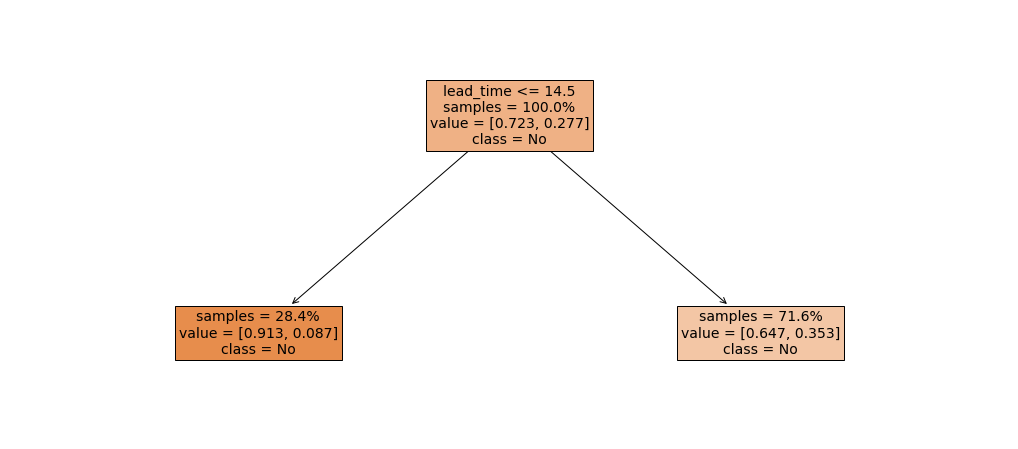

In [42]:
input_features=['lead_time']

tree_model_lead2 = DecisionTreeClassifier(max_depth=1)
tree_model_lead2.fit(X_all_train[input_features], y_all_train)

fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model_lead2,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No","Yes"], ax=ax, fontsize=14); 

In [43]:
y_pred_lead2 = tree_model_lead2.predict(X_all_test[input_features])
pd.crosstab(y_all_test, y_pred_lead2, rownames=["Actual"], colnames=["Predicted"], margins=True)

Predicted,No,All
Actual,,
No,5781,5781
Yes,2231,2231
All,8012,8012


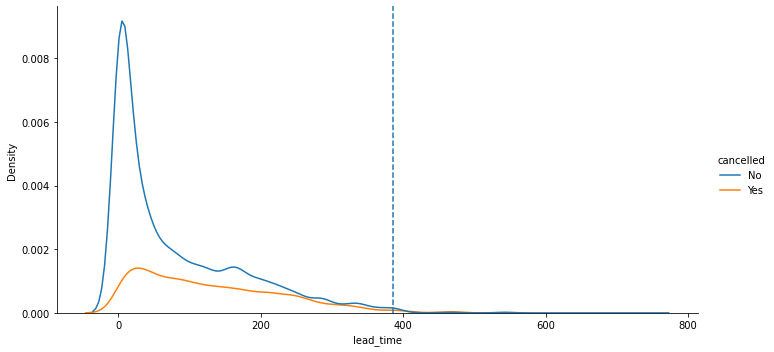

In [44]:
fg = sns.displot(kind='kde', x='lead_time', hue='cancelled', data=hotel2_data, aspect=2);
fg.ax.axvline(386, ls='--');

In [45]:
y_pred_human = pd.cut(X_all_test['lead_time'], bins=[0,386,800], labels=["No","Yes"], include_lowest=True)
pd.crosstab(y_all_test, y_pred_human, rownames=["Actual"], colnames=["Predicted"], margins=True)

Predicted,No,Yes,All
Actual,,,
No,5764,17,5781
Yes,2208,23,2231
All,7972,40,8012


In [46]:
print("Precision: " , 23/40*100)
print("Recall: " , 23/2231*100)

Precision:  57.49999999999999
Recall:  1.0309278350515463


Predicted,No,Yes,All
Actual,,,
No,5771,10,5781
Yes,2039,192,2231
All,7810,202,8012


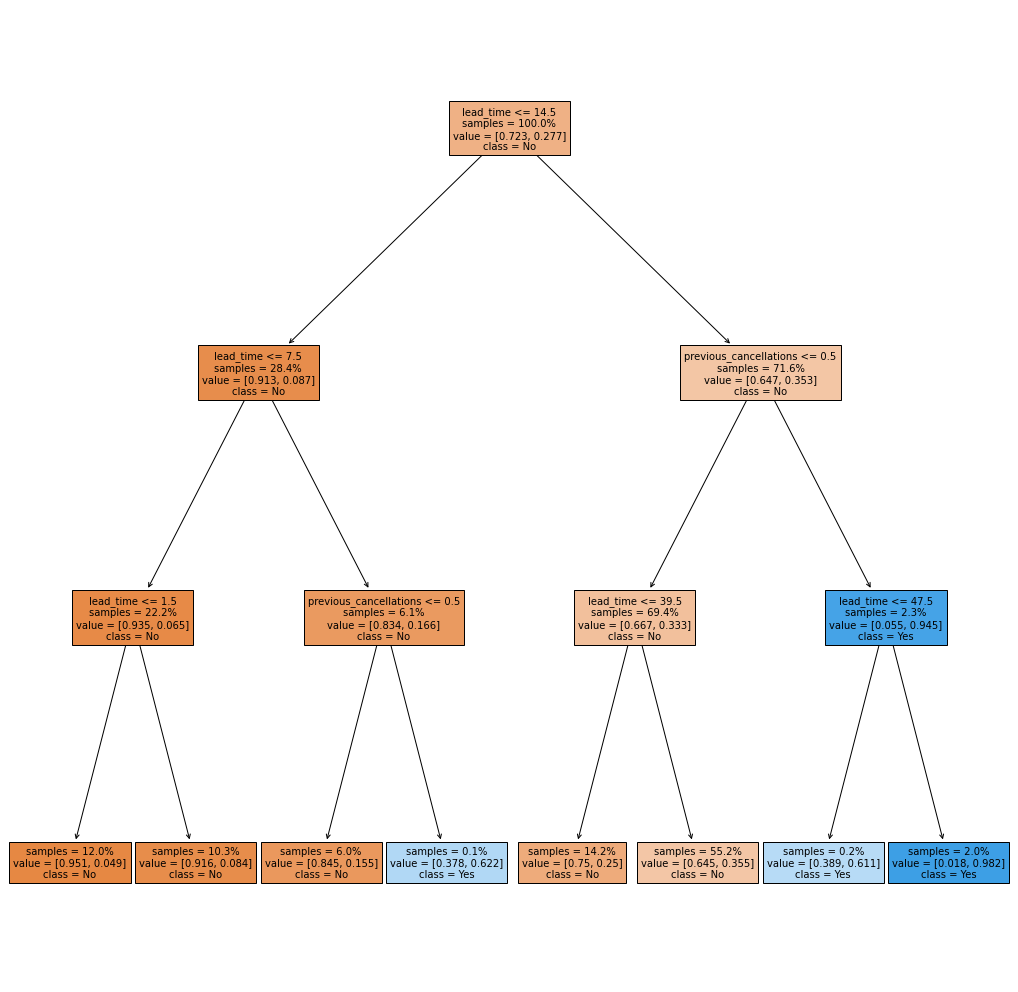

In [47]:
input_features2=[ 'lead_time', 'previous_cancellations']

tree_model_lt_pc = DecisionTreeClassifier(max_depth=3)
tree_model_lt_pc.fit(X_all_train[input_features2], y_all_train)

fig, ax = plt.subplots(figsize=(18,18))
plot_tree(tree_model_lt_pc,  filled=True, impurity=False, feature_names=input_features2, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=10); 

y_pred_lt_pc = tree_model_lt_pc.predict(X_all_test[input_features2])

pd.crosstab(y_all_test, y_pred_lt_pc, rownames=["Actual"], colnames=["Predicted"], margins=True)

In [48]:
print("Precision: " , 192/202*100)
print("Recall: " , 23/2231*100)

Precision:  95.04950495049505
Recall:  1.0309278350515463


In [49]:
hotel_data.groupby('cancelled').agg({'booking_changes': ['count','mean', 'std']}) 

booking_changes                    
                    count      mean       std
cancelled                                    
No                  75166  0.293364  0.736266
Yes                 44224  0.098340  0.451008

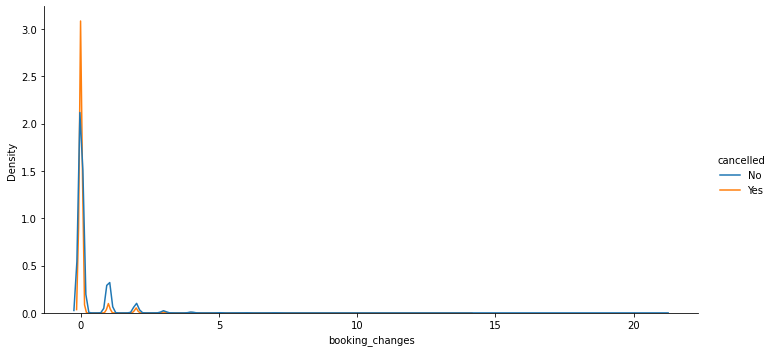

In [50]:
sns.displot(data=hotel1_data, kind='kde', x='booking_changes', hue='cancelled', aspect=2 ); 

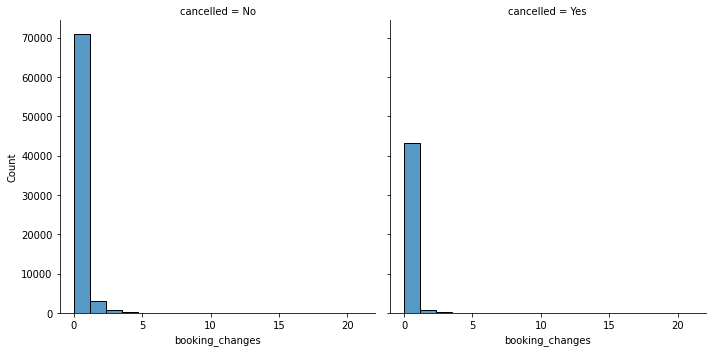

In [51]:
sns.displot(x='booking_changes', col='cancelled', data=hotel_data);

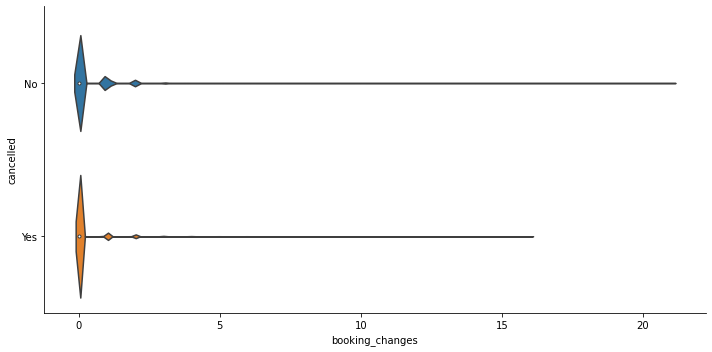

In [52]:
sns.catplot(data=hotel_data, kind="violin", x="booking_changes", y="cancelled", aspect=2);

In [53]:
hotel_data['days_in_waiting_list'].value_counts() 

0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [54]:
hotel_data.groupby('cancelled').agg({'days_in_waiting_list': ['count','mean', 'std']})

days_in_waiting_list                     
                         count      mean        std
cancelled                                          
No                       75166  1.589868  14.784875
Yes                      44224  3.564083  21.488768

In [55]:
features=['hotel','days_in_waiting_list',]

hotel_data.groupby('hotel')[features].mean()

,days_in_waiting_list
hotel,
City Hotel,3.226774
Resort Hotel,0.527758


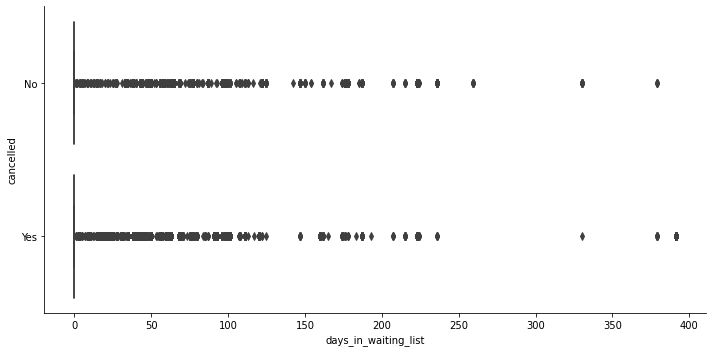

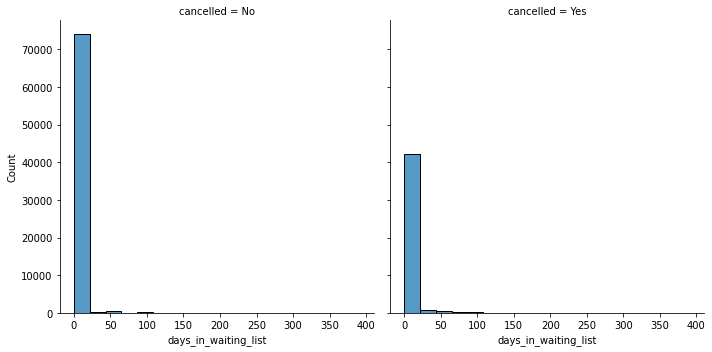

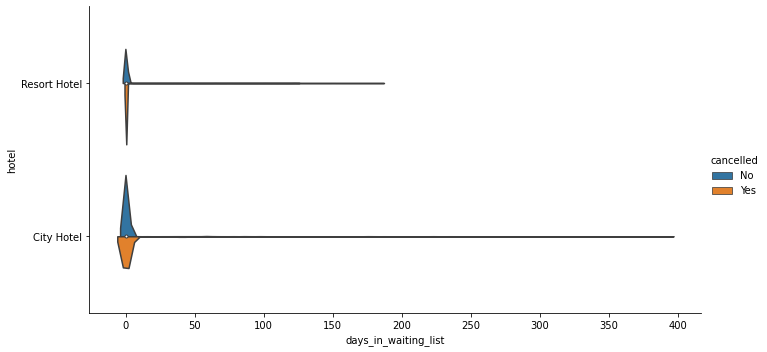

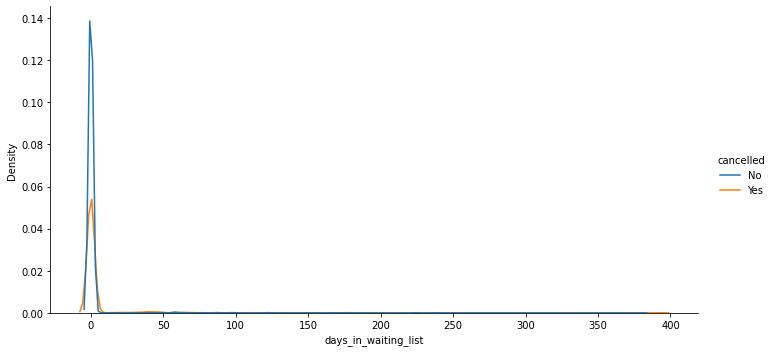

In [56]:
sns.catplot(data=hotel_data, kind='box', x='days_in_waiting_list', y='cancelled', aspect=2);

sns.displot(data=hotel_data, x='days_in_waiting_list', col='cancelled');

sns.catplot(data=hotel_data, kind='violin', x='days_in_waiting_list', y='hotel',  
            hue='cancelled',  split=True,  aspect=2);

sns.displot(data=hotel_data, kind='kde', x='days_in_waiting_list', hue='cancelled', aspect=2 );

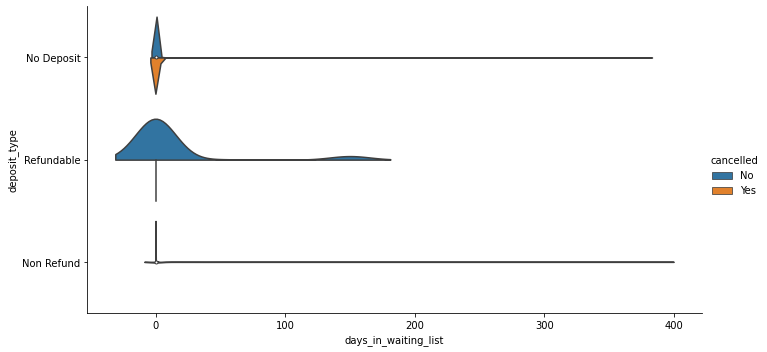

In [58]:
sns.catplot(data=hotel_data, kind='violin', x='days_in_waiting_list', y='deposit_type',  
            hue='cancelled',  split=True,  aspect=2);

In [59]:
hotel_data['previous_cancellations'].value_counts() 

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [60]:
hotel_data[hotel_data['previous_cancellations']==0]

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled,cancelled
0,Resort Hotel,Direct,No Deposit,342,0,0,0,3,0,0,No
1,Resort Hotel,Direct,No Deposit,737,0,0,0,4,0,0,No
2,Resort Hotel,Direct,No Deposit,7,0,0,0,0,0,0,No
3,Resort Hotel,Corporate,No Deposit,13,0,0,0,0,0,0,No
4,Resort Hotel,Online TA,No Deposit,14,0,0,0,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,Offline TA/TO,No Deposit,23,0,0,0,0,0,0,No
119386,City Hotel,Online TA,No Deposit,102,0,0,0,0,2,0,No
119387,City Hotel,Online TA,No Deposit,34,0,0,0,0,4,0,No
119388,City Hotel,Online TA,No Deposit,109,0,0,0,0,0,0,No


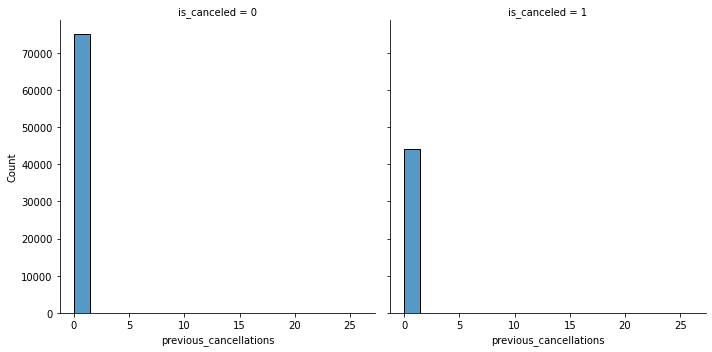

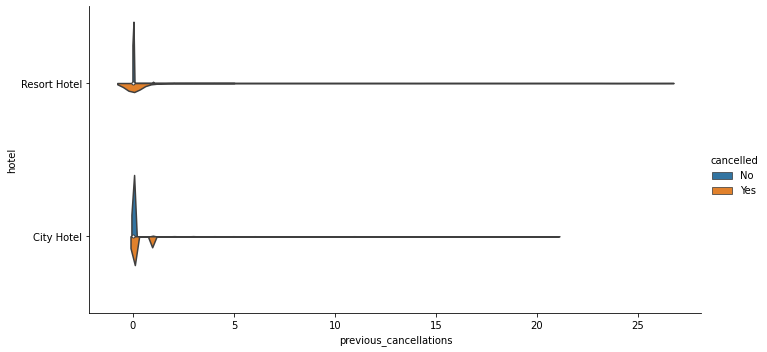

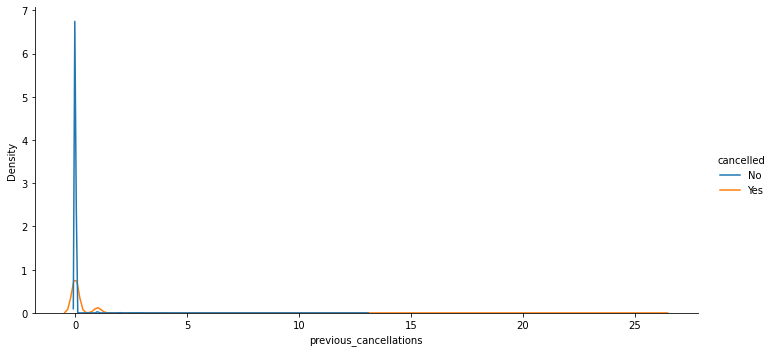

In [61]:
sns.displot(x='previous_cancellations', col='is_canceled', data=hotel_data);

sns.catplot(data=hotel_data, kind='violin', x='previous_cancellations', y='hotel',  
            hue='cancelled',  split=True,  aspect=2);

sns.displot(data=hotel_data, kind='kde', x='previous_cancellations', hue='cancelled', aspect=2 );

Size of X_all_train:  (63464, 6)
Length of y_all_train:  63464
Size of X_all_test:  (15866, 6)
Length of y_all_test:  15866


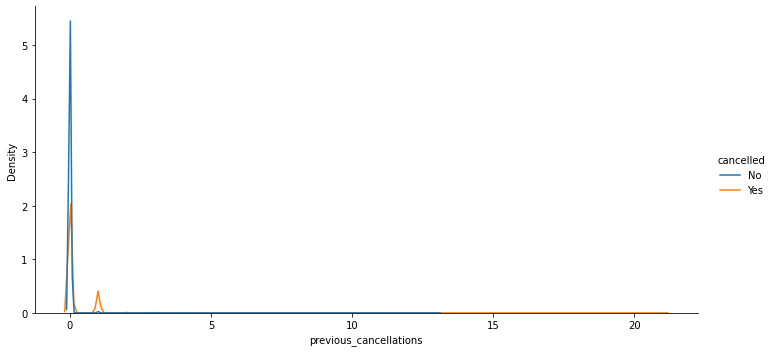

In [62]:
sns.displot(data=hotel1_data, kind='kde', x='previous_cancellations', hue='cancelled', aspect=2 );

y = hotel1_data['cancelled']

all_features=['lead_time' , 'previous_cancellations', 'previous_bookings_not_canceled' , 'days_in_waiting_list', 'booking_changes' , 'total_of_special_requests']
X_all=hotel1_data[all_features]

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, train_size=0.8, random_state=1)

print("Size of X_all_train: ",X_all_train.shape)
print("Length of y_all_train: ",len(y_all_train))
print("Size of X_all_test: ",X_all_test.shape)
print("Length of y_all_test: ",len(y_all_test))

Predicted,No,Yes,All
Actual,,,
No,9086,76,9162
Yes,5674,1030,6704
All,14760,1106,15866


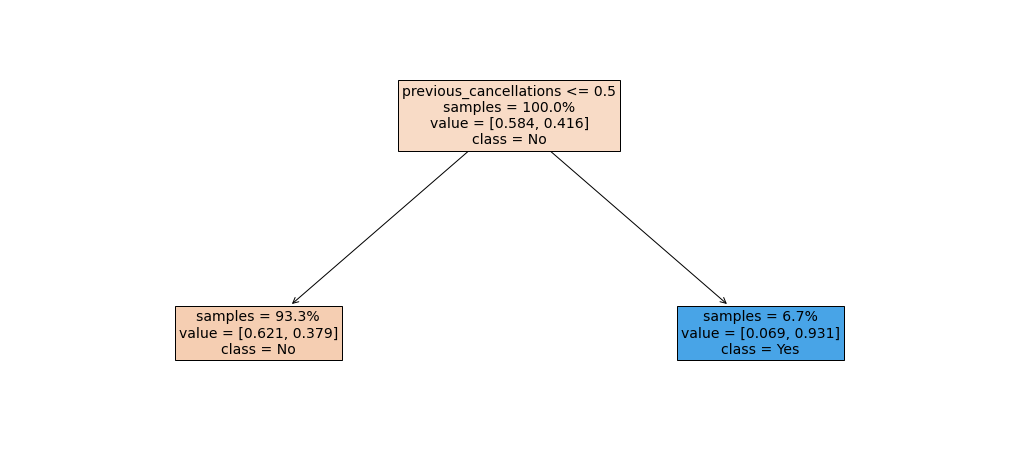

In [63]:
input_features=['previous_cancellations']


tree_model_pc = DecisionTreeClassifier(max_depth=1)
tree_model_pc.fit(X_all_train[input_features], y_all_train)


fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model_pc,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No","Yes"], ax=ax, fontsize=14); 

y_pred_pc = tree_model_pc.predict(X_all_test[input_features])

    
pd.crosstab(y_all_test, y_pred_pc, rownames=["Actual"], colnames=["Predicted"], margins=True)

In [65]:
print("Precision: " , 1030/1106*100)
print("Recall: " , 1030/6704*100)

Precision:  93.12839059674502
Recall:  15.363961813842483


Predicted,No,Yes,All
Actual,,,
No,9086,76,9162
Yes,5674,1030,6704
All,14760,1106,15866


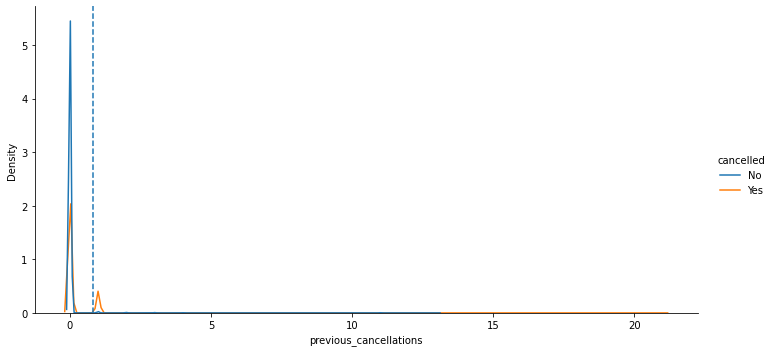

In [66]:
fg = sns.displot(kind='kde', x='previous_cancellations', hue='cancelled', data=hotel1_data, aspect=2);

fg.ax.axvline(0.8, ls='--');

y_pred_pc2 = pd.cut(X_all_test['previous_cancellations'], bins=[0,0.8,50], labels=["No","Yes"], include_lowest=True)

pd.crosstab(y_all_test, y_pred_pc2, rownames=["Actual"], colnames=["Predicted"], margins=True)

In [67]:
print("Precision: " , 1030/1106*100)
print("Recall: " , 1030/6704*100)

Precision:  93.12839059674502
Recall:  15.363961813842483


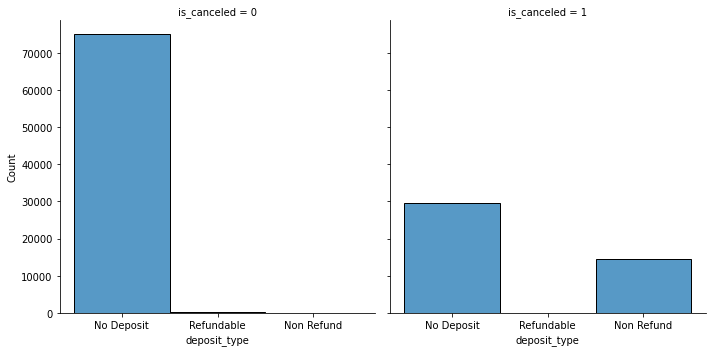

In [68]:
sns.displot(x='deposit_type', col='is_canceled', data=hotel_data);

In [69]:
pd.crosstab(hotel_data['deposit_type'], hotel_data['cancelled'], normalize='index')

cancelled,No,Yes
deposit_type,,
No Deposit,0.716230,0.283770
Non Refund,0.006376,0.993624
Refundable,0.777778,0.222222


In [70]:
nonrefundable_data=hotel_data[hotel_data['deposit_type'] == 'Non Refund'].copy()
  
nonrefundable_data 

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled,cancelled
2133,Resort Hotel,Groups,Non Refund,87,0,0,0,0,0,1,Yes
2134,Resort Hotel,Groups,Non Refund,87,0,0,0,0,0,1,Yes
2135,Resort Hotel,Groups,Non Refund,87,0,0,0,0,0,1,Yes
2136,Resort Hotel,Groups,Non Refund,87,0,0,0,0,0,1,Yes
2141,Resort Hotel,Groups,Non Refund,87,0,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...
95424,City Hotel,Corporate,Non Refund,172,0,0,0,1,0,0,No
95936,City Hotel,Corporate,Non Refund,178,0,0,0,1,0,0,No
96193,City Hotel,Offline TA/TO,Non Refund,198,0,0,0,0,0,0,No
96232,City Hotel,Online TA,Non Refund,186,0,0,0,0,0,0,No


In [71]:
pd.crosstab(nonrefundable_data['cancelled'], nonrefundable_data['hotel'])

hotel,City Hotel,Resort Hotel
cancelled,,
No,24,69
Yes,12844,1650


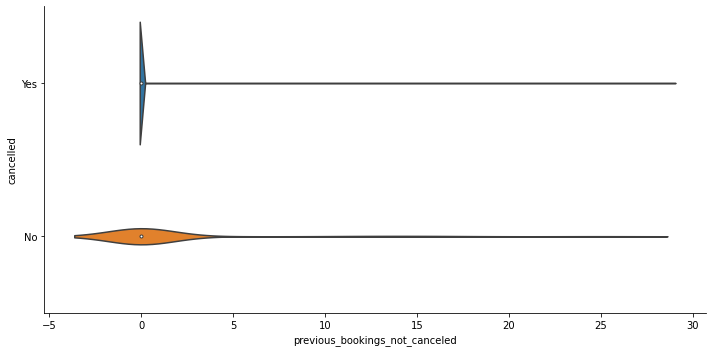

In [72]:
sns.catplot(data=nonrefundable_data, kind='violin', x='previous_bookings_not_canceled', y='cancelled',  split=True,  aspect=2);

cancelled,No,Yes
market_segment,,
Corporate,0.065868,0.934132
Direct,0.157895,0.842105
Groups,0.006760,0.993240
Offline TA/TO,0.000599,0.999401
Online TA,0.053571,0.946429


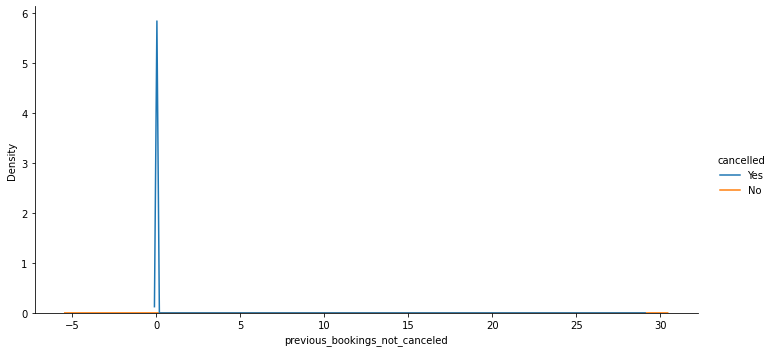

In [73]:
sns.displot(data=nonrefundable_data, kind='kde', x='previous_bookings_not_canceled', hue='cancelled', aspect=2 );

pd.crosstab(nonrefundable_data['market_segment'], nonrefundable_data['cancelled'], normalize='index')

In [74]:
refundable_data=hotel_data[hotel_data['deposit_type'] == 'Refundable'].copy()
  
refundable_data 

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled,cancelled
1559,Resort Hotel,Groups,Refundable,14,0,0,0,0,0,0,No
4737,Resort Hotel,Groups,Refundable,169,0,0,0,1,0,0,No
4738,Resort Hotel,Groups,Refundable,169,0,0,0,1,0,0,No
4739,Resort Hotel,Groups,Refundable,169,0,0,0,1,0,0,No
4740,Resort Hotel,Groups,Refundable,169,0,0,0,1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
79652,City Hotel,Offline TA/TO,Refundable,0,0,0,0,1,0,0,No
79980,City Hotel,Offline TA/TO,Refundable,29,0,0,0,0,0,0,No
85497,City Hotel,Corporate,Refundable,51,0,0,0,0,0,0,No
85498,City Hotel,Corporate,Refundable,51,0,0,0,0,0,0,No


In [75]:
pd.crosstab(refundable_data['cancelled'], refundable_data['hotel'])

hotel,City Hotel,Resort Hotel
cancelled,,
No,6,120
Yes,14,22


In [76]:
nodeposit_data=hotel_data[hotel_data['deposit_type'] == 'No Deposit'].copy()
  
nodeposit_data

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled,cancelled
0,Resort Hotel,Direct,No Deposit,342,0,0,0,3,0,0,No
1,Resort Hotel,Direct,No Deposit,737,0,0,0,4,0,0,No
2,Resort Hotel,Direct,No Deposit,7,0,0,0,0,0,0,No
3,Resort Hotel,Corporate,No Deposit,13,0,0,0,0,0,0,No
4,Resort Hotel,Online TA,No Deposit,14,0,0,0,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,Offline TA/TO,No Deposit,23,0,0,0,0,0,0,No
119386,City Hotel,Online TA,No Deposit,102,0,0,0,0,2,0,No
119387,City Hotel,Online TA,No Deposit,34,0,0,0,0,4,0,No
119388,City Hotel,Online TA,No Deposit,109,0,0,0,0,0,0,No


In [77]:
pd.crosstab(nodeposit_data['cancelled'], nodeposit_data['hotel'])

hotel,City Hotel,Resort Hotel
cancelled,,
No,46198,28749
Yes,20244,9450


In [78]:
pd.crosstab(nodeposit_data['market_segment'], nodeposit_data['cancelled'], normalize='index')

cancelled,No,Yes
market_segment,,
Aviation,0.780591,0.219409
Complementary,0.869448,0.130552
Corporate,0.863022,0.136978
Direct,0.847707,0.152293
Groups,0.717004,0.282996
Offline TA/TO,0.827893,0.172107
Online TA,0.633566,0.366434
Undefined,0.000000,1.000000


In [80]:
hotel_data[hotel_data['market_segment']=="Undefined"]

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled,cancelled
40600,City Hotel,Undefined,No Deposit,2,0,0,0,0,1,1,Yes
40679,City Hotel,Undefined,No Deposit,1,0,0,0,0,2,1,Yes


In [81]:
hotel_data2=nodeposit_data[(nodeposit_data['market_segment'] != "Undefined")].copy()
hotel_data2

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled,cancelled
0,Resort Hotel,Direct,No Deposit,342,0,0,0,3,0,0,No
1,Resort Hotel,Direct,No Deposit,737,0,0,0,4,0,0,No
2,Resort Hotel,Direct,No Deposit,7,0,0,0,0,0,0,No
3,Resort Hotel,Corporate,No Deposit,13,0,0,0,0,0,0,No
4,Resort Hotel,Online TA,No Deposit,14,0,0,0,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,Offline TA/TO,No Deposit,23,0,0,0,0,0,0,No
119386,City Hotel,Online TA,No Deposit,102,0,0,0,0,2,0,No
119387,City Hotel,Online TA,No Deposit,34,0,0,0,0,4,0,No
119388,City Hotel,Online TA,No Deposit,109,0,0,0,0,0,0,No


In [82]:
pd.crosstab(hotel_data2['market_segment'], hotel_data2['cancelled'], normalize='index')

cancelled,No,Yes
market_segment,,
Aviation,0.780591,0.219409
Complementary,0.869448,0.130552
Corporate,0.863022,0.136978
Direct,0.847707,0.152293
Groups,0.717004,0.282996
Offline TA/TO,0.827893,0.172107
Online TA,0.633566,0.366434


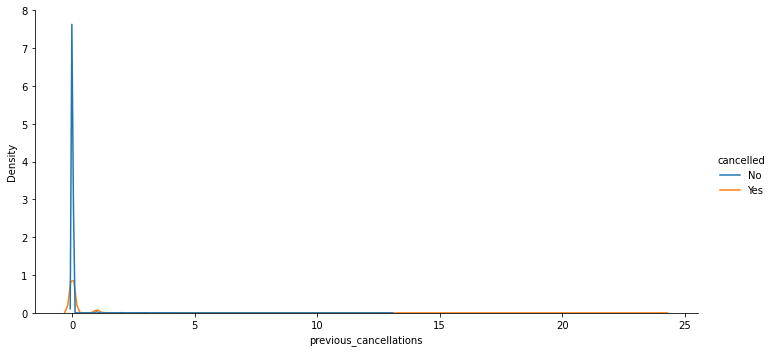

In [83]:
sns.displot(data=hotel_data2, kind='kde', x='previous_cancellations', hue='cancelled', aspect=2 );

In [85]:
features=['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'booking_changes', 'total_of_special_requests']

hotel_data2.groupby('cancelled')[features].mean()

,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests
cancelled,,,,,,
No,79.832201,0.015838,0.201863,1.573765,0.292433,0.715999
Yes,111.289034,0.108177,0.036407,1.382089,0.141621,0.488381


In [86]:
y = hotel_data2['cancelled']

all_features=['lead_time' , 'previous_cancellations', 'previous_bookings_not_canceled' , 'days_in_waiting_list', 'booking_changes' , 'total_of_special_requests']
X_all=hotel_data2[all_features]

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, train_size=0.8, random_state=1)

print("Size of X_all_train: ",X_all_train.shape)
print("Length of y_all_train: ",len(y_all_train))
print("Size of X_all_test: ",X_all_test.shape)
print("Length of y_all_test: ",len(y_all_test))

Size of X_all_train:  (83711, 6)
Length of y_all_train:  83711
Size of X_all_test:  (20928, 6)
Length of y_all_test:  20928


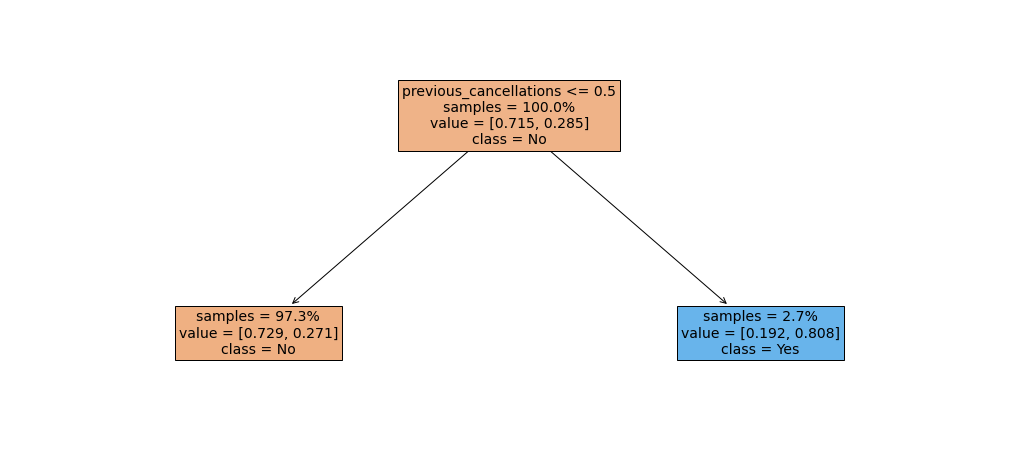

In [87]:
input_features=['previous_cancellations']

tree_model_dt = DecisionTreeClassifier(max_depth=1)
tree_model_dt.fit(X_all_train[input_features], y_all_train)

fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model_dt,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No","Yes"], ax=ax, fontsize=14); 

In [88]:
y_pred_dt = tree_model_dt.predict(X_all_test[input_features])
pd.crosstab(y_all_test, y_pred_dt, rownames=["Actual"], colnames=["Predicted"], margins=True)

Predicted,No,Yes,All
Actual,,,
No,15001,106,15107
Yes,5361,460,5821
All,20362,566,20928


In [89]:
print("Precision: " , 460/566*100)
print("Recall: " , 460/5821*100)

Precision:  81.2720848056537
Recall:  7.902422264215771


In [90]:
y = nonrefundable_data['cancelled']

all_features=['lead_time' , 'previous_cancellations', 'previous_bookings_not_canceled' , 'days_in_waiting_list', 'booking_changes' , 'total_of_special_requests']
X_all=nonrefundable_data[all_features]

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, train_size=0.8, random_state=1)

print("Size of X_all_train: ",X_all_train.shape)
print("Length of y_all_train: ",len(y_all_train))
print("Size of X_all_test: ",X_all_test.shape)
print("Length of y_all_test: ",len(y_all_test))

Size of X_all_train:  (11669, 6)
Length of y_all_train:  11669
Size of X_all_test:  (2918, 6)
Length of y_all_test:  2918


In [91]:
features=['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'booking_changes', 'total_of_special_requests']

nonrefundable_data.groupby('cancelled')[features].mean()

,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests
cancelled,,,,,,
No,106.215054,0.000000,1.344086,0.021505,0.494624,0.086022
Yes,213.593487,0.414102,0.002070,8.043397,0.009383,0.001242


Predicted,No,Yes,All
Actual,,,
No,1,18,19
Yes,1,2898,2899
All,2,2916,2918


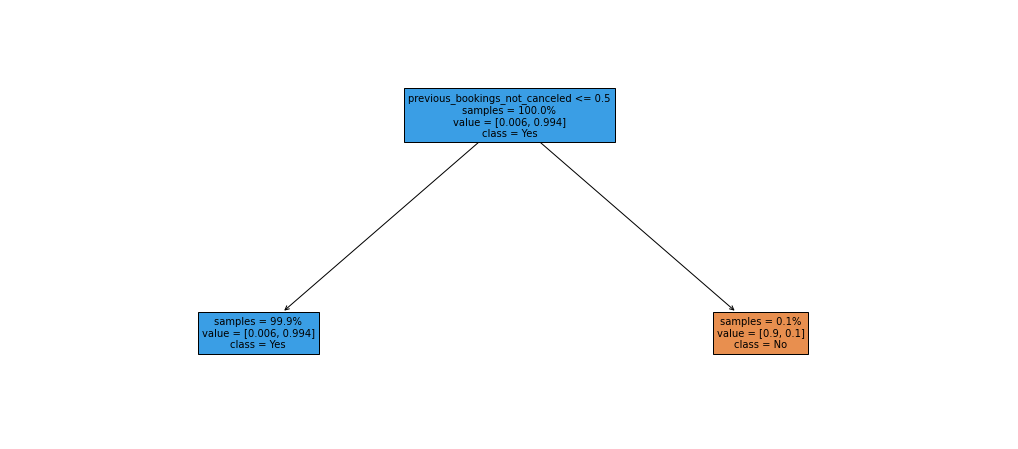

In [92]:
input_features=['previous_bookings_not_canceled']

tree_model_nr = DecisionTreeClassifier(max_depth=1)
tree_model_nr.fit(X_all_train[input_features], y_all_train)

fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model_nr,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=10);

y_pred_nr = tree_model_nr.predict(X_all_test[input_features])

    
pd.crosstab(y_all_test, y_pred_nr, rownames=["Actual"], colnames=["Predicted"], margins=True)

In [93]:
print("Precision: " , 2898/2916*100)
print("Recall: " , 2898/2899*100)

Precision:  99.38271604938271
Recall:  99.96550534667126
